# I21 - sitting in

## 8-9/8/22

See:
https://drive.google.com/drive/folders/1czNpZXJ-6xC6WA2MBa3WWsuRhbYpzYkc

What is missing? Not much.

Will add links to last dark field and last carbon.

Grouped metadata fields are helpful.

Difficulat to pick out stuff in scan.

Check: metadata format for devices that have no NeXus class - is this consistent?

Is it possible to flatten in a reasonable way and avoid flat list?

Look at processing information: how can tis be used for re-processing?

Need a standard description of detector for processing (but parameters might need to be nominal and overidable.

Look at form of dispersion data and corresponding fits - standard processed file format???

I21 is a good example of 'standard' measurements and potentially standard and quite simple processed data/results. Not a good example for needing flexibility and hardware changes.

I21 team use Jupyter notebook and Google docs.

Plot out energy/temp dependence 3d plots.






# Metadata/before scan



Question: Can we extract the same information from the scannable-NeXus conversions and NeXus classes as we get from the 'before_scan' collection?

Can get it from the automatic conversions via @gda_field_name etc

We have scalar scannables as NXpositioners ('value' field) and vector scannables (same as scannable groups??) as NXcollections with scannable field names as NeXus field names.  This is probably manageable as long as there is not a third option where these are mixed. This was proposed at some point but I don't see it in the I21 NeXus files.

The real missing infortion is the scannable field names that correspond to NeXus field values of defined classes (NXmirror, NXmonochromator etc) and there seems to be no way of linking these. Could we add @gda_field_name attributes to NeXus fields where they exist?

We need @decimals attributes in order to display the field values in a better way (which is consistent with how we currently write .dat files).


----
Next: add scannable name and field_name attributes to dictionary and creat dataframe.
----


In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook #### stopped working!
#%matplotlib nbagg



=== Importing dlstools package


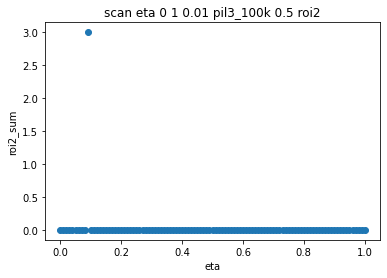

root:NXroot
  entry1:NXentry
    before_scan:NXcollection
      PPR:NXcollection
        ppchi = -45.000192359
        pppiezo1 = 0.0
        pppiezo2 = 12345.012359999999
        ppth1 = -5.5957439486
        ppth2 = -0.0008084726
        ppz1 = 11.0
        ppz2 = 11.0
      Ta:NXcollection
        Ta = 6.5309
      Tb:NXcollection
        Tb = 6.4865
      alpha:NXcollection
        alpha = 49.81665157554109
      beamline_slits:NXcollection
        s1xcentre = -0.006
        s1xgap = 2.512
        s1ycentre = 0.006
        s1ygap = 0.901
        s2xcentre = -0.200025
        s2xgap = 19.999325
        s2ycentre = 0.3085
        s2ygap = 20.0
        s3xcentre = 2.261
        s3xgap = 24.8285
        s3ycentre = -0.65
        s3ygap = 20.0015
        s4xcentre = -5.887
        s4xgap = 36.6275
        s4ycentre = -0.0005
        s4ygap = 28.0065
        shtr3x = 11.545
        shtr3y = 4.28
      beta:NXcollection
        beta = -36.11583619693862
      delta_offset:NXcollection
   

In [2]:
# I16 NeXus file
p='/dls/i16/data/2022/cm28156-15/%i.nxs'
n1 = pdnx(p % 926175)
n1.nx.plot()
#n1.plot()
print(n1.nx.tree)

In [3]:
n1

,TimeFromEpoch,TimeSec,count_time,delta_axis_offset,eta,ic1monitor,kap,kdelta,kgam,kmu,kphi,kth,maxval,maxx,maxy,path,rc,roi2_maxval,roi2_maxx,roi2_maxy,roi2_sum,sum
0,1.646406e+09,99725.864782,0.5,0.0,-4.263256e-13,0.497615,-136.100288,40.0,0.0,0.0,60.913522,57.913522,0.0,0.0,0.0,1.0,0.080146,0.0,0.0,0.0,0.0,-22.0
1,1.646406e+09,99727.429380,0.5,0.0,1.000000e-02,0.561724,-136.100288,40.0,0.0,0.0,60.913522,57.923522,0.0,0.0,0.0,2.0,0.080514,0.0,0.0,0.0,0.0,-22.0
2,1.646406e+09,99729.169600,0.5,0.0,2.000000e-02,0.589201,-136.100288,40.0,0.0,0.0,60.913522,57.933522,1.0,336.0,1.0,3.0,0.075069,0.0,0.0,0.0,0.0,-12.0
3,1.646406e+09,99730.894793,0.5,0.0,3.000000e-02,0.576986,-136.100288,40.0,0.0,0.0,60.913522,57.943522,0.0,0.0,0.0,4.0,0.077218,0.0,0.0,0.0,0.0,-22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.646406e+09,99899.242612,0.5,0.0,9.700000e-01,0.534246,-136.100288,40.0,0.0,0.0,60.913522,58.883522,1.0,84.0,170.0,98.0,0.074061,0.0,0.0,0.0,0.0,-19.0
98,1.646406e+09,99901.157494,0.5,0.0,9.800000e-01,0.543405,-136.100288,40.0,0.0,0.0,60.913522,58.893522,1.0,455.0,31.0,99.0,0.069782,0.0,0.0,0.0,0.0,-18.0
99,1.646406e+09,99903.055473,0.5,0.0,9.900000e-01,0.552564,-136.100288,40.0,0.0,0.0,60.913522,58.903522,0.0,0.0,0.0,100.0,0.073821,0.0,0.0,0.0,0.0,-22.0
100,1.646406e+09,99904.987949,0.5,0.0,1.000000e+00,0.549513,-136.100288,40.0,0.0,0.0,60.913522,58.913522,0.0,0.0,0.0,101.0,0.073169,0.0,0.0,0.0,0.0,-22.0


=== Failed to create DataFrame from data - create empty DataFrame


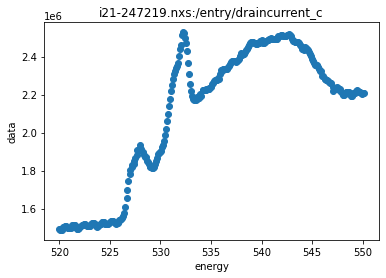

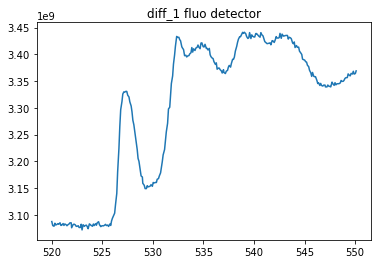

In [4]:
# easy to get quick plot but painful to plot other columns

p='/dls/i21/data/2022/cm31147-3/i21-%i.nxs'
p1 = '/dls/i21/data/2022/cm31147-3/BNOO6/i21-%i.nxs'
#n = pdnx(p % 240978)
#n = pdnx(p1 % 247219)
n2 = pdnx(p1 % 247219, entry = '/entry', data ='/diamond_scan')

n2.nx.plot()
plot(np.array(n2.nx.entry.instrument.energy.value), np.array(n2.nx.entry.instrument.diff1_c.data)); title('diff_1 fluo detector')
print()

In [5]:
print(n2.nx.entry.diamond_scan.scan_command)
print(n2.nx.entry.diamond_scan.scan_fields)
print('No. of scan points: %i' % len(n2.nx.entry.instrument.energy.value))
print('No. of scan fields: %i' % len(n2.nx.entry.diamond_scan.scan_fields))
print(n2.nx.tree)
n2.find('energy')

scan energy 520 550 0.1 draincurrent_c 0.2 diff1_c 0.2 fy2_c 0.2 m4c1_c 0.2
['energy', 'energy_demand', 'energy_diff', 'id_gap', 'id_gap_demand', 'id_gap_diff', 'draincurrent_c', 'diff1_c', 'fy2_c', 'm4c1_c']
No. of scan points: 301
No. of scan fields: 10
root:NXroot
  @file_name = '/dls/i21/data/2022/cm31147-3/BNOO6/i21-247219.nxs'
  entry:NXentry
    @default = 'draincurrent_c'
    diamond_scan:NXcollection
      duration = 58866
        @target = '/entry/diamond_scan/duration'
        @units = 'ms'
      end_time = '2022-08-08T13:48:26.976'
        @target = '/entry/diamond_scan/end_time'
      keys:NXcollection
        uniqueKeys = int32(301)
      point_end_times = ['2022-08-08T13:47:28.407', '2022-08-08T13:47:28.411', '...
      point_start_times = ['2022-08-08T13:47:28.407', '2022-08-08T13:47:28.411', '...
      scan_command = 'scan energy 520 550 0.1 draincurrent_c 0.2 diff1_c 0.2 f...'
        @target = '/entry/diamond_scan/scan_command'
      scan_dead_time = 58867
        @u

In [6]:
len(n2.nx.entry.instrument.energy.value)

301

=== Failed to create DataFrame from data - create empty DataFrame
scan ds 1 10 1 andor 180 m4c1 180 checkbeam
['ds', 'checkrc_beamok', 'checktopup_time_beamok', 'count_time', 'm4c1']
No. of scan points: 10
No. of scan fields: 5
root:NXroot
  @file_name = '/dls/i21/data/2022/cm31147-3/BNOO6/i21-247393.nxs'
  entry:NXentry
    @default = 'andor'
    andor:NXdata
      @axes = ['ds', '.', '.']
      @checkbeam_indices = 0
      @ds_indices = 0
      @signal = 'data'
      checkbeam -> /entry/instrument/checkbeam/checkrc_beamok
      data -> andor-247393.hdf['/entry/instrument/detector/data']
      ds -> /entry/instrument/ds/value
    current_script_name -> /entry/diamond_scan/current_script_name
    diamond_scan:NXcollection
      current_script_name = 'Ba2CaOsO6_Edep_RIXS_220808.py'
        @target = '/entry/diamond_scan/current_script_name'
      duration = 1671205
        @target = '/entry/diamond_scan/duration'
        @units = 'ms'
      end_time = '2022-08-09T08:55:59.122'
        @

=== Failed to create DataFrame from data - create empty DataFrame


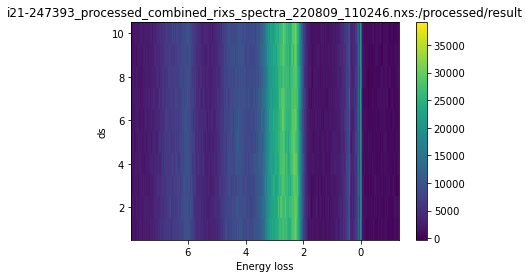

NXfield('uk.ac.diamond.scisoft.analysis.processing.operations.backgroundsubtraction.SubtractFittedBackgroundOperation')

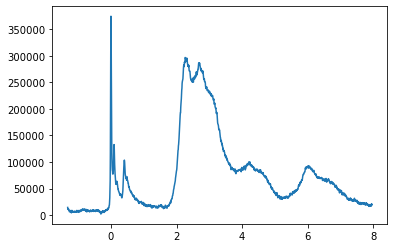

In [7]:
# display raw detector data
# display 1d detector spectrum

#Ba2CaOsO6 RIXS 527eV low temp
n3 = pdnx(p1 % 247393)
#print(n.nx.tree)

print(n3.nx.entry.diamond_scan.scan_command)
print(n3.nx.entry.diamond_scan.scan_fields)
print('No. of scan points: %i' % len(n3.nx.entry.instrument.ds.value))
print('No. of scan fields: %i' % len(n3.nx.entry.diamond_scan.scan_fields))
print(n3.nx.tree)
n3.find('energy')


#n.nx.entry.andor.data
# or
#n.nx.entry.instrument.andor.data
n3.nx.entry.instrument.andor.data.shape
im_sum = n3.nx.entry.instrument.andor.data.sum(0)
figure()
imshow(im_sum, vmin=3000, vmax=4000)

n3 = pdnx('/dls/i21/data/2022/cm31147-3/processing/BNOO6/i21-247393_processed_combined_rixs_spectra_220809_110246.nxs')
n3.nx.plot()
figure()
plot(np.array(n3.nx.processed.result['Energy loss']), np.array(n3.nx.processed.result['data'].sum(0)))
n3.nx.processed.process['0'].id #id of process


In [8]:
print(n3.nx.tree)

root:NXroot
  @default = 'processed'
  entry:NXentry -> ../../BNOO6/i21-247393.nxs['/entry']
    @default = 'andor'
    andor:NXdata
      @axes = ['ds', '.', '.']
      @checkbeam_indices = 0
      @ds_indices = 0
      @signal = 'data'
      checkbeam -> /entry/instrument/checkbeam/checkrc_beamok
      data -> andor-247393.hdf['/entry/instrument/detector/data']
      ds -> /entry/instrument/ds/value
    current_script_name -> /entry/diamond_scan/current_script_name
    diamond_scan:NXcollection
      current_script_name = 'Ba2CaOsO6_Edep_RIXS_220808.py'
        @target = '/entry/diamond_scan/current_script_name'
      duration = 1671205
        @target = '/entry/diamond_scan/duration'
        @units = 'ms'
      end_time = '2022-08-09T08:55:59.122'
        @target = '/entry/diamond_scan/end_time'
      keys:NXcollection
        uniqueKeys = int32(10)
      point_end_times = ['2022-08-09T08:28:08.332', '2022-08-09T08:31:12.159', '...
      point_start_times = ['2022-08-09T08:28:08.332

In [9]:
n3.nx.processed.process['0'].id

NXfield('uk.ac.diamond.scisoft.analysis.processing.operations.backgroundsubtraction.SubtractFittedBackgroundOperation')

In [10]:
n2.nx.entry.diamond_scan.scan_fields

NXfield(['energy', 'energy_demand', 'energy_diff', 'id_gap', 'id_gap_demand', 'id_gap_diff', 'draincurrent_c', 'diff1_c', 'fy2_c', 'm4c1_c'])

In [11]:
#take a look at metadata
n3 = pdnx(p1 % 247393)
#print(n.nx.tree)
n3.pruned_tree(2)

=== Failed to create DataFrame from data - create empty DataFrame
.entry
.entry.andor
.entry.current_script_name
.entry.diamond_scan
.entry.duration
.entry.end_time
.entry.instrument
.entry.m4c1
.entry.m4c1_gain
.entry.program_name
.entry.sample
.entry.scan_command
.entry.scan_fields
.entry.scan_shape
.entry.start_time
.entry.user01


In [12]:
print(n3.nx.entry.diamond_scan.tree)

diamond_scan:NXcollection
  current_script_name = 'Ba2CaOsO6_Edep_RIXS_220808.py'
    @target = '/entry/diamond_scan/current_script_name'
  duration = 1671205
    @target = '/entry/diamond_scan/duration'
    @units = 'ms'
  end_time = '2022-08-09T08:55:59.122'
    @target = '/entry/diamond_scan/end_time'
  keys:NXcollection
    uniqueKeys = int32(10)
  point_end_times = ['2022-08-09T08:28:08.332', '2022-08-09T08:31:12.159', '...
  point_start_times = ['2022-08-09T08:28:08.332', '2022-08-09T08:31:12.159', '...
  scan_command = 'scan ds 1 10 1 andor 180 m4c1 180 checkbeam'
    @target = '/entry/diamond_scan/scan_command'
  scan_dead_time = 1671206
    @units = 'ms'
  scan_dead_time_percent = 100.00006103515625
  scan_estimated_duration = -1
    @units = 'ms'
  scan_fields = ['ds', 'checkrc_beamok', 'checktopup_time_beamok', 'coun...
    @target = '/entry/diamond_scan/scan_fields'
  scan_finished = 1
  scan_rank = 1
  scan_shape = 10
    @target = '/entry/diamond_scan/scan_shape'
  start_

In [13]:
print(n3.nx.entry.instrument.tree)

instrument:NXinstrument
  andor:NXdetector
    andor_settings:NXcollection
      accumulation_period = 184.45176696777344
        @units = 's'
      adc_speed = '1.00 MHz'
      binning_x = 1
      binning_y = 1
      cooler_control = 'On'
      cooler_status = 'Stabilized at set point'
      cooler_temperature = -70.0
        @units = '°C'
      em_ccd_gain = 0
      image_size_x = 2048
      image_size_y = 2048
      preamp_gain = '4.00'
      region_size_x = 2048
      region_size_y = 2048
      region_start_x = 0
      region_start_y = 0
      sensor_size_x = 2048
      sensor_size_y = 2048
      shutter_ext_TTL = 'High To Open'
      shutter_mode = 'Fully Auto'
      temperature_actual = -73.40599822998047
        @units = '°C'
      vertical_shift_amplitude = 'Normal'
      vertical_shift_speed = '38.55 us'
    count_time = float64(10)
      @local_name = 'andor.count_time'
    data -> andor-247393.hdf['/entry/instrument/detector/data']
    description = 'Andor - an in vacuum X-r

In [14]:
### create dataframe
### create full nexus name
### show units if they exist
### use @decimals if they exist
### how to relate NeXus fields to scannable names and scannable field names?
### do we still need flat list? Hopefully not.
### use diamond_scan for all dataframe requirements? Test this on I21 data.

### meta(group) - return list of all fields as dict 'full_field', 'value', 'unit'
### use this to generate dataframe and key-value assignments
### e.g. meta_df(group) and kv_df(group)
### keys are made by joining full path inside group using '_'



group = n3.nx.entry.instrument
for thing in group:
    #print(thing)
    print(n3.nx.entry.instrument[thing].tree)
    for field in n3.nx.entry.instrument[thing]:
        #full_field = ''
        #print('\t',thing, '\t', field, '\t', n.nx.entry.instrument[thing][field])


        print('o\t', thing, '\t', field, '\t', n3.nx.entry.instrument[thing][field])

        

andor:NXdetector
  andor_settings:NXcollection
    accumulation_period = 184.45176696777344
      @units = 's'
    adc_speed = '1.00 MHz'
    binning_x = 1
    binning_y = 1
    cooler_control = 'On'
    cooler_status = 'Stabilized at set point'
    cooler_temperature = -70.0
      @units = '°C'
    em_ccd_gain = 0
    image_size_x = 2048
    image_size_y = 2048
    preamp_gain = '4.00'
    region_size_x = 2048
    region_size_y = 2048
    region_start_x = 0
    region_start_y = 0
    sensor_size_x = 2048
    sensor_size_y = 2048
    shutter_ext_TTL = 'High To Open'
    shutter_mode = 'Fully Auto'
    temperature_actual = -73.40599822998047
      @units = '°C'
    vertical_shift_amplitude = 'Normal'
    vertical_shift_speed = '38.55 us'
  count_time = float64(10)
    @local_name = 'andor.count_time'
  data -> andor-247393.hdf['/entry/instrument/detector/data']
  description = 'Andor - an in vacuum X-ray camera.'
  local_name = 'andor'
  manufacturer = 'Andor'
  model = 'DO936_BN'
o	 an

In [15]:
#modified
def _find_key(group, key, previous_keys=[]):
    global _keylist
    try:
        for keyval in group.keys():
            if keyval == key or key == '':
                _keylist += [previous_keys + [keyval]]
            self._find_key(group[keyval], key, previous_keys = previous_keys + [keyval])
    except:
        pass

#modified
def findkeys(group, keystring):
    'Return list of key sequences (lists) that end with keystring'    
    global _keylist
    _keylist=[]
    _find_key(group, keystring)
    return _keylist
    


def pruned_tree(group, depth):
    'Print pruned tree'
    allfieldlist = findkeys(group, '')
    previous = []
    for fieldlist in allfieldlist:
        fieldshort = fieldlist[:depth]
        if fieldshort != previous:
            print(n._list_to_dot_sep_string(fieldshort))
            previous = fieldshort

In [16]:
import nexusformat
#type(n.nx.entry.instrument.id.bottomInner) == nexusformat.nexus.tree.NXfield

#decimals = _nx[entrydata][key].attrs['decimals']


def _find_key(tree, key, previous_keys=[]):
    global _keylist, _dictlist
    try:
        for keyval in tree.keys():
            if keyval == key or key == '':

                try:
                    if (type(tree[keyval]) == nexusformat.nexus.tree.NXfield):
                        
                        if 'units' in tree[keyval].attrs:
                            units = tree[keyval].attrs['units']
                        else:
                            units = None
                        
                        if 'decimals' in tree[keyval].attrs:
                            decimals = tree[keyval].attrs['decimals']
                        else:
                            decimals = None
                                                   
                        if 'gda_field_name' in tree[keyval].attrs:
                            gda_field_name = tree[keyval].attrs['gda_field_name']
                        else:
                            gda_field_name = None                                          
                        
                        _dictlist += [{'key': previous_keys + [keyval], 'value':  tree[keyval], 'units': units, 
                                       'decimals': decimals, 'gda_field_name': gda_field_name} ]
                    
                except:
                    print('something went wrong. field: ', previous_keys + [keyval])
                    
                _keylist += [previous_keys + [keyval]]
            _find_key(tree[keyval], key, previous_keys = previous_keys + [keyval])
    except:
        pass

def findkeys(keystring):
    'Return list of key sequences (lists) that end with keystring'    
    global _keylist
    _keylist=[]
    _find_key(n.nx, keystring)
    return _keylist

def findfieldssgrp(group, keystring):
    'Return list of key sequences (lists) that end with keystring'    
    global _keylist, _dictlist
    _keylist, _dictlist = [], []    
    _find_key(group, keystring)
    #return _fieldlist    
    return _dictlist

In [17]:
# mock-up of key-value pairs for .dat file
# need to put strings and lists in quotes
# could optionally remove last '_value' from key?

md_dictlist = findfieldssgrp(n2.nx.entry.instrument, '')

sep = '_'
for field in md_dictlist:
    try: #use quotes if value can't be cast to float
        float(field['value'])
        print(sep.join(field['key']) + ' = ' + "{0}".format(field['value']))
    except:
        print(sep.join(field['key']) + ' = ' + "'{0}'".format(field['value']))

beamline = 'i21'
diff1_c_data = '[3.087333e+09 3.079875e+09 3.078565e+09 ... 3.363171e+09 3.364201e+09
 3.369128e+09]'
diff1_c_description = 'Waveform Channel'
diff1_c_id = 'diff1_c'
diff1_c_type = 'Waveform'
draincurrent_c_data = '[1492431. 1487303. 1488940. ... 2201329. 2205400. 2207667.]'
draincurrent_c_description = 'Waveform Channel'
draincurrent_c_id = 'draincurrent_c'
draincurrent_c_type = 'Waveform'
energy_energy_demand = '[520.  520.1 520.2 ... 549.8 549.9 550. ]'
energy_energy_diff = '[-0.0134 -0.0075 -0.0316 ... -0.1051 -0.1229 -0.1034]'
energy_id_gap = '[21.21175 21.214   21.21725 ... 21.78885 21.79035 21.7907 ]'
energy_id_gap_demand = '[21.211365 21.213292 21.215218 ... 21.785404 21.78733  21.789256]'
energy_id_gap_diff = '[-0.000385 -0.000708 -0.002032 ... -0.003446 -0.00302  -0.001444]'
energy_name = 'energy'
energy_value = '[520.0134 520.1075 520.2316 ... 549.9051 550.0229 550.1034]'
fast_shutter_x = 29.3
fy2_c_data = '[1.200284e+09 1.199820e+09 1.196704e+09 ... 1.19876

In [18]:
#_meta_frame = pd.DataFrame.from_dict(md_dictlist)
_meta_frame = pd.DataFrame(md_dictlist)
_rows = pd.get_option('display.max_rows')
pd.get_option('display.max_rows', 999)
display(HTML(_meta_frame.to_html(index=False)))
pd.set_option('display.max_rows', _rows)


key,value,units,decimals,gda_field_name
[beamline],i21,None,None,None
"[diff1_c, data]",[3.087333e+09 3.079875e+09 3.078565e+09 ... 3.363171e+09 3.364201e+09 3.369128e+09],None,None,None
"[diff1_c, description]",Waveform Channel,None,None,None
"[diff1_c, id]",diff1_c,None,None,None
"[diff1_c, type]",Waveform,None,None,None
"[draincurrent_c, data]",[1492431. 1487303. 1488940. ... 2201329. 2205400. 2207667.],None,None,None
"[draincurrent_c, description]",Waveform Channel,None,None,None
"[draincurrent_c, id]",draincurrent_c,None,None,None
"[draincurrent_c, type]",Waveform,None,None,None
"[energy, energy_demand]",[520. 520.1 520.2 ... 549.8 549.9 550. ],None,None,energy_demand


In [19]:
new_dictlist = []
for md_dict in md_dictlist:
    new_dictlist += [
        {
        'nexus_field': md_dict['key'][-1],
        'scannable_field': md_dict['gda_field_name'],
        'value': md_dict['value'],
        'units': md_dict['units'],     
        'decimals': md_dict['decimals'],
        'NeXus_path': '/'+'/'.join(md_dict['key'])
        }               
                    ]
    #print(md_dict['key'][-1])
#print(new_dictlist)



_meta_frame = pd.DataFrame(new_dictlist).fillna('') # replace None with blank
_rows = pd.get_option('display.max_rows')
pd.get_option('display.max_rows', 999)
display(HTML(_meta_frame.to_html(index=False)))
pd.set_option('display.max_rows', _rows)


nexus_field,scannable_field,value,units,decimals,NeXus_path
beamline,,i21,,,/beamline
data,,[3.087333e+09 3.079875e+09 3.078565e+09 ... 3.363171e+09 3.364201e+09 3.369128e+09],,,/diff1_c/data
description,,Waveform Channel,,,/diff1_c/description
id,,diff1_c,,,/diff1_c/id
type,,Waveform,,,/diff1_c/type
data,,[1492431. 1487303. 1488940. ... 2201329. 2205400. 2207667.],,,/draincurrent_c/data
description,,Waveform Channel,,,/draincurrent_c/description
id,,draincurrent_c,,,/draincurrent_c/id
type,,Waveform,,,/draincurrent_c/type
energy_demand,energy_demand,[520. 520.1 520.2 ... 549.8 549.9 550. ],,,/energy/energy_demand


In [20]:
n2.nx.entry.instrument.polariser.gamma

NXfield(258.6288)

In [21]:
md_dictlist[0]['key']

['beamline']

In [22]:
'/'.join(md_dictlist[0]['key'])

'beamline'

In [23]:
_meta_frame.fillna('', inplace=True)